In [44]:
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

warnings.filterwarnings("ignore")

<h3>Reading data</h3>

In [45]:
df = pd.read_csv("Q1_data.csv")
label = LabelEncoder()
df['id'] = label.fit_transform(df['symbol'])
df.head()

,Unnamed: 0,symbol,name,time_stamp,time_high,time_low,open,close,high,low,market_cap,volume,id
0,0,BTC,Bitcoin,2023-05-17T23:59:59.999Z,2023-05-17T20:09:00.000Z,2023-05-17T14:03:00.000Z,27035.470130,27398.802028,27465.927904,26600.144844,5.308901e+11,1.514001e+10,1
1,1,BTC,Bitcoin,2023-05-13T23:59:59.999Z,2023-05-13T18:50:00.000Z,2023-05-13T00:32:00.000Z,26807.769044,26784.078561,27030.482960,26710.873803,5.188737e+11,9.999172e+09,1
2,2,BTC,Bitcoin,2023-03-08T23:59:59.999Z,2023-03-08T00:23:00.000Z,2023-03-08T23:43:00.000Z,22216.442321,21718.079830,22268.896252,21708.050506,4.194214e+11,2.253658e+10,1
3,3,BTC,Bitcoin,2023-02-21T23:59:59.999Z,2023-02-21T08:30:00.000Z,2023-02-21T22:06:00.000Z,24833.048914,24436.354485,25126.851686,24200.364116,4.715777e+11,3.125210e+10,1
4,4,BTC,Bitcoin,2022-10-15T23:59:59.999Z,2022-10-15T03:59:00.000Z,2022-10-15T23:04:00.000Z,19185.437304,19067.635082,19212.541608,19019.250125,3.657224e+11,1.619224e+10,1


<h3>Scatter plot of data</h6>

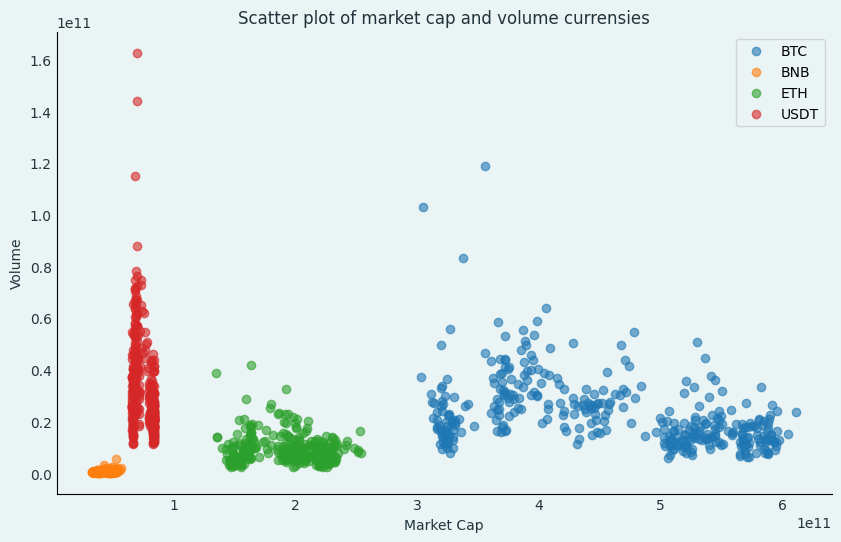

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df[df['symbol']=='BTC']["market_cap"], df[df['symbol']=='BTC']["volume"], marker="o", cmap="viridis", alpha=0.6, label='BTC')
ax.scatter(df[df['symbol']=='BNB']["market_cap"], df[df['symbol']=='BNB']["volume"], marker="o", cmap="viridis", alpha=0.6, label='BNB')
ax.scatter(df[df['symbol']=='ETH']["market_cap"], df[df['symbol']=='ETH']["volume"], marker="o", cmap="viridis", alpha=0.6, label='ETH')
ax.scatter(df[df['symbol']=='USDT']["market_cap"], df[df['symbol']=='USDT']["volume"], marker="o", cmap="viridis", alpha=0.6, label='USDT')
ax.set_title(
    "Scatter plot of market cap and volume currensies", fontsize=12, color="#22333b"
)
ax.set_ylabel("Volume", fontsize=10, color="#22333b")
ax.set_xlabel("Market Cap", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
ax.legend(facecolor="#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

As we can see the Market Cap of all cryptocurrencies, except for Tether (because it is stablecoin and its market value does not change much), has significantly decreased from its high value. The decline in market value is particularly noticeable for Bitcoin, which has a larger market value compared to other cryptocurrencies. This decrease in Market Cap is attributed to the events that took place in November 2022, as mentioned in this [link](https://www.reuters.com/markets/currencies/cryptos-attempt-steady-binance-ftx-deal-chills-market-2022-11-09/).

Due to Bitcoin's popularity and Tether's status as a well-known stablecoin, both currencies have a higher transaction Volume compared to other cryptocurrencies.

<h3>Section 1</h6>

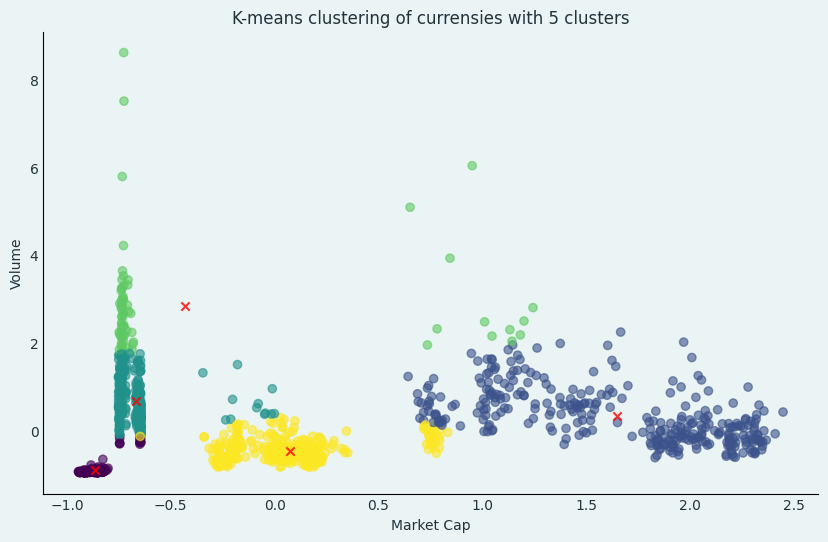

In [47]:
data = df[["market_cap", "volume"]]
#scaler = MinMaxScaler()
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data))
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data)
centers = kmeans.cluster_centers_

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data[0], data[1], c=kmeans.labels_, marker="o", cmap="viridis", alpha=0.6)
ax.scatter(centers[:, 0], centers[:, 1], c="red", marker="x", alpha=0.8)
ax.set_title("K-means clustering of currensies with 5 clusters", fontsize=12, color="#22333b")
ax.set_ylabel("Volume", fontsize=10, color="#22333b")
ax.set_xlabel("Market Cap", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

<h3>Section 2</h3>

Prior to clustering, it is necessary to scale the data to ensure that the features have a similar impact.[[ref]](https://towardsdatascience.com/normalization-vs-standardization-cb8fe15082eb/) Typically, data is standardized before clustering, meaning that the average of all features is adjusted to zero and their standard deviation is set to one. In our case, we initially standardize the data, but we also evaluate the normalized state of the data.

<h4>Standardization:</h4>

<h5>Within-Cluster Sum of Square analysis</h5>

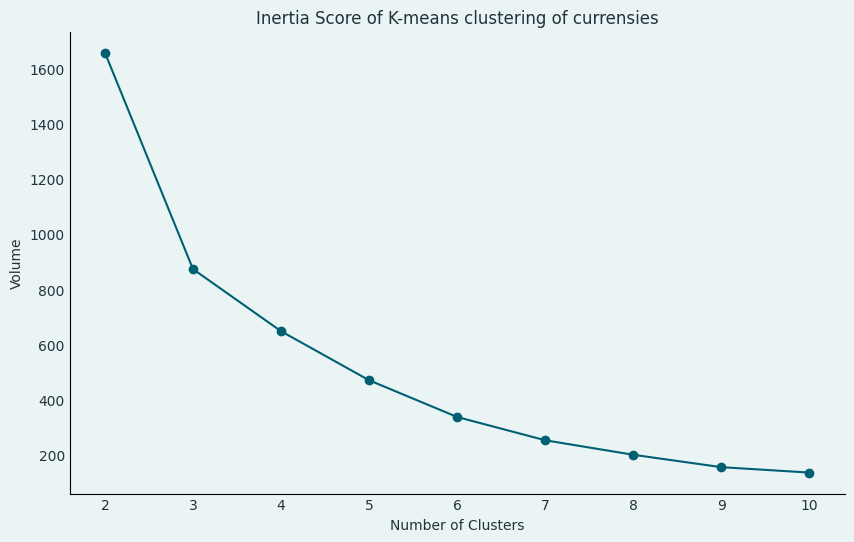

In [48]:
iner = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    iner.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(2, 11), iner, marker="o", color="#005f73")
ax.set_title(
    "Inertia Score of K-means clustering of currensies", fontsize=12, color="#22333b"
)
ax.set_ylabel("Volume", fontsize=10, color="#22333b")
ax.set_xlabel("Number of Clusters", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

Upon observation, it is evident that there is no distinct elbow point that can be identified. Therefore, we need to employ alternative methods for determining the optimal number of clusters.

<h5>silhouette analysis</h5>

The Silhouette method is a technique used to determine the optimal number of clusters in a K-means clustering algorithm. It evaluates the quality of clustering by measuring how similar an object is to its own cluster compared to other clusters. The higher the silhouette score, the better the clustering quality.

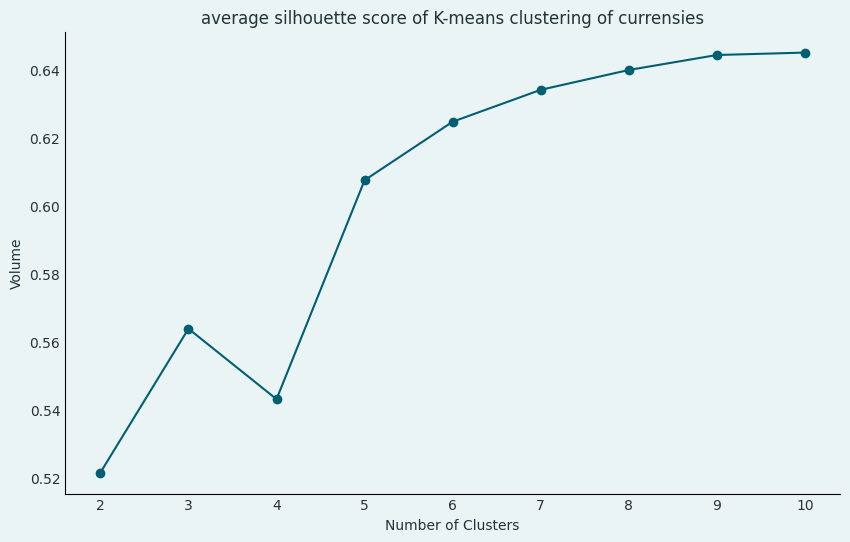

In [49]:
silhouette = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    silhouette.append(silhouette_score(data, labels))

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(2, 11), silhouette, marker="o", color="#005f73")
ax.set_title(
    "average silhouette score of K-means clustering of currensies", fontsize=12, color="#22333b"
)
ax.set_ylabel("Volume", fontsize=10, color="#22333b")
ax.set_xlabel("Number of Clusters", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

As observed, the silhouette score increases as the number of clusters increases. However, we are still unable to determine the exact number of clusters based on this criterion alone. In the subsequent analysis, we will delve deeper into the results obtained from the silhouette method.<br> The code provided in the following section is sourced from this [link](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

For n_clusters = 2 The average silhouette_score is : 0.5214130244261803
For n_clusters = 3 The average silhouette_score is : 0.5637752062213556
For n_clusters = 4 The average silhouette_score is : 0.5430254447763436
For n_clusters = 5 The average silhouette_score is : 0.6075006410095587
For n_clusters = 6 The average silhouette_score is : 0.6247242907531533
For n_clusters = 7 The average silhouette_score is : 0.634121622438494
For n_clusters = 8 The average silhouette_score is : 0.6399563115199285
For n_clusters = 9 The average silhouette_score is : 0.6443670174380852
For n_clusters = 10 The average silhouette_score is : 0.6450820523066444


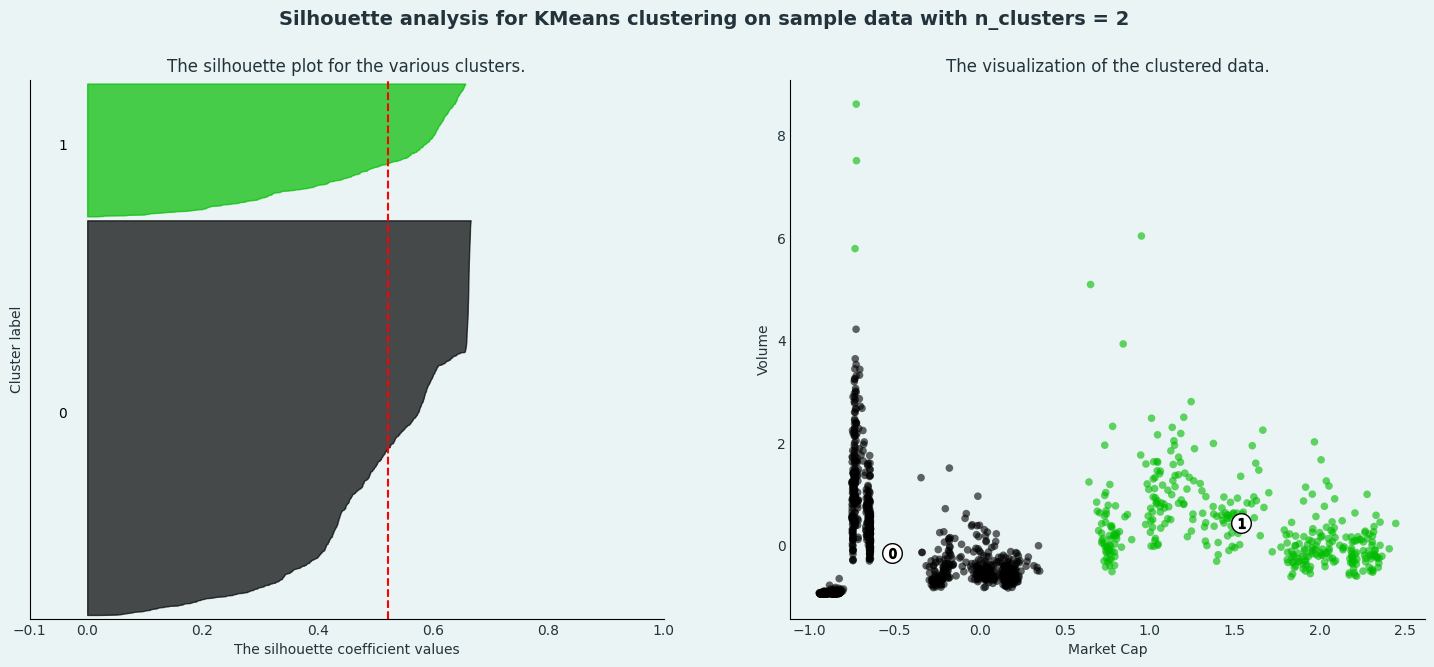

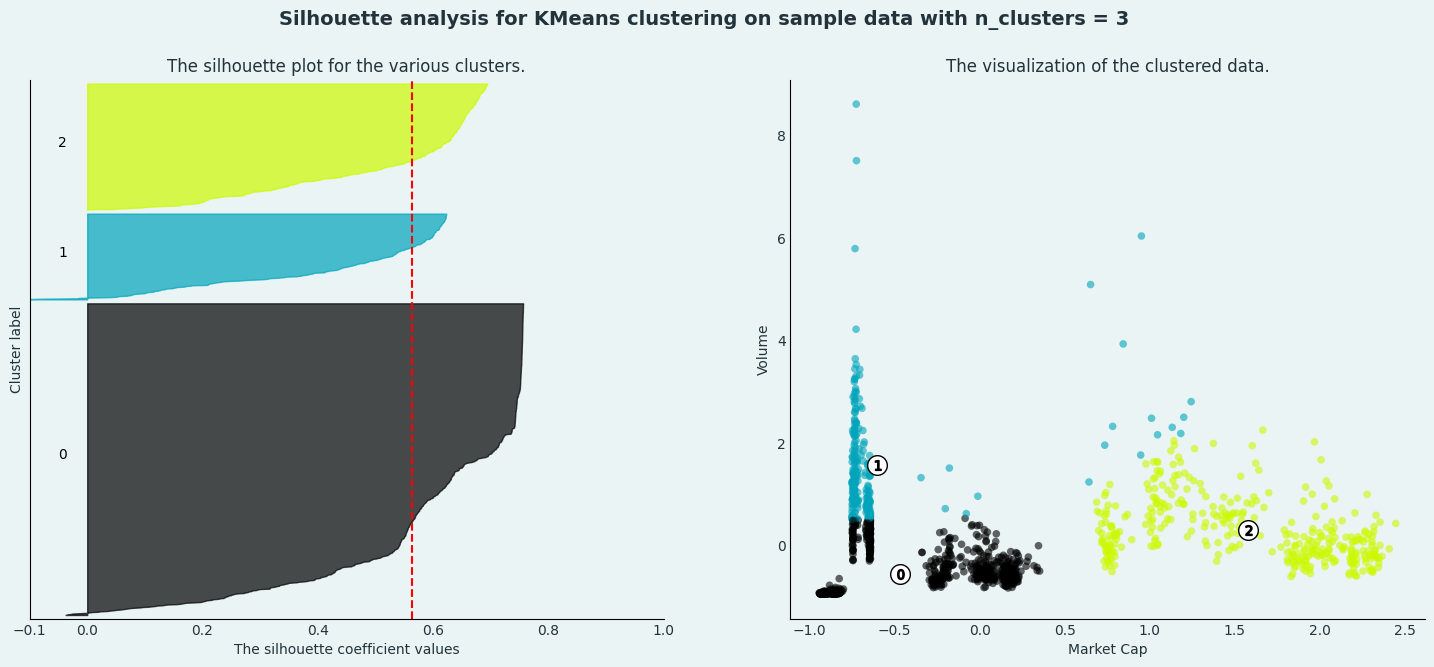

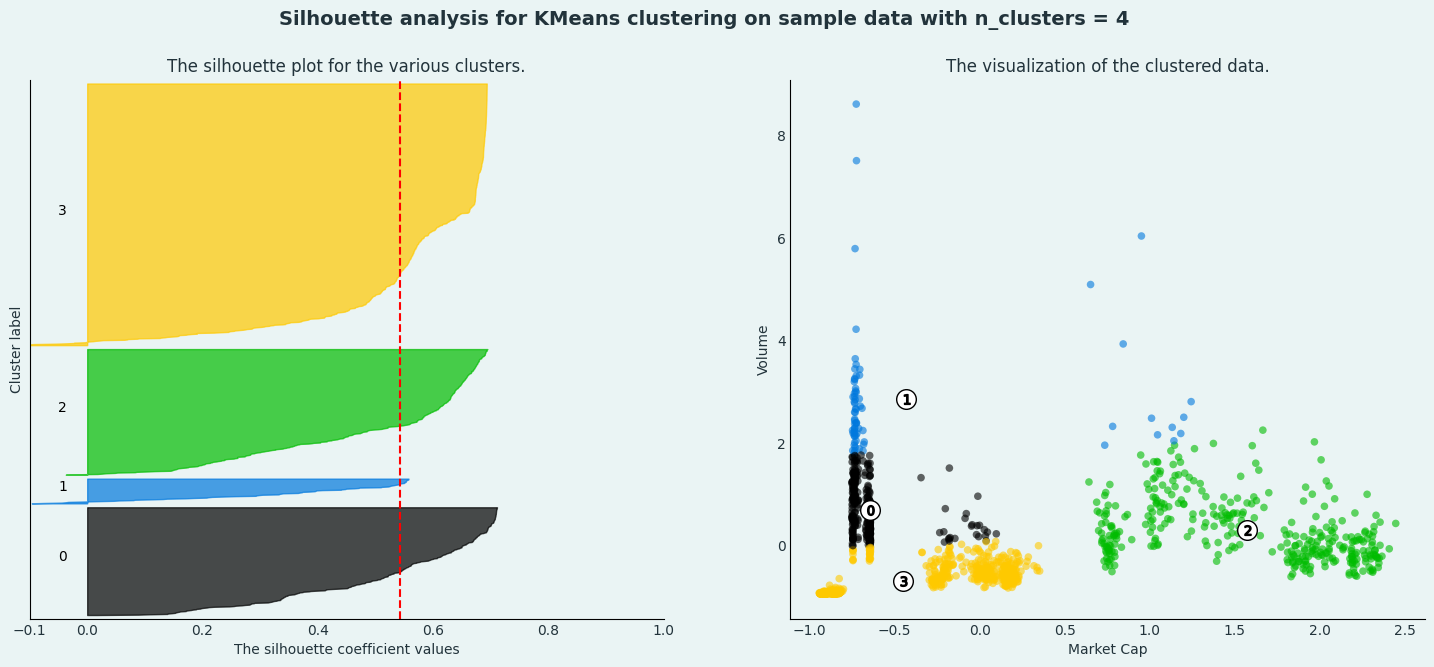

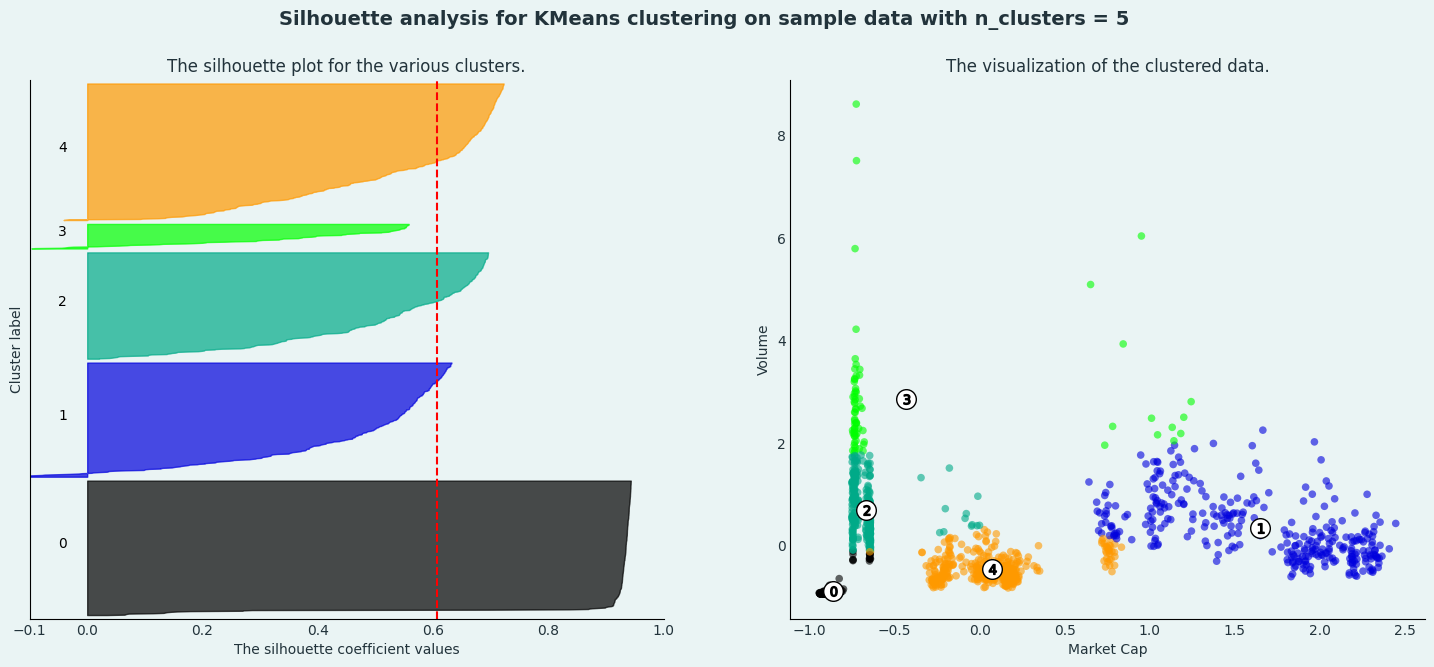

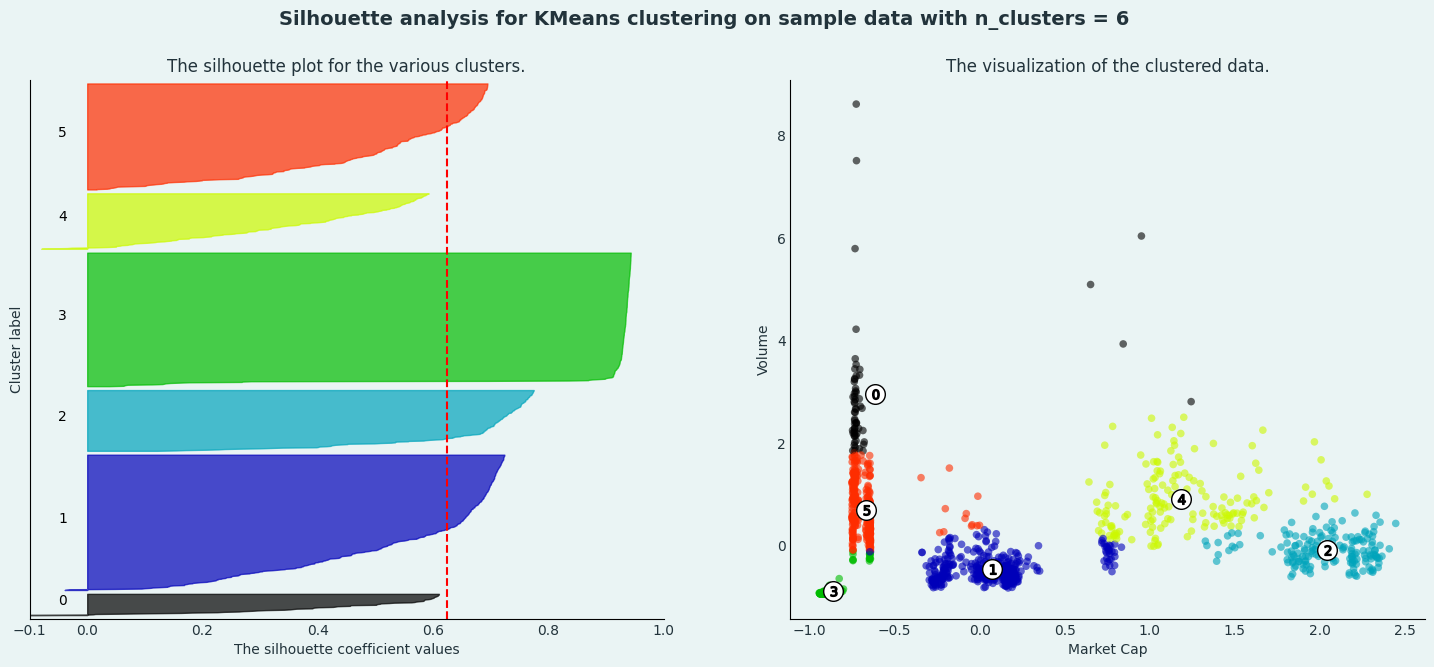

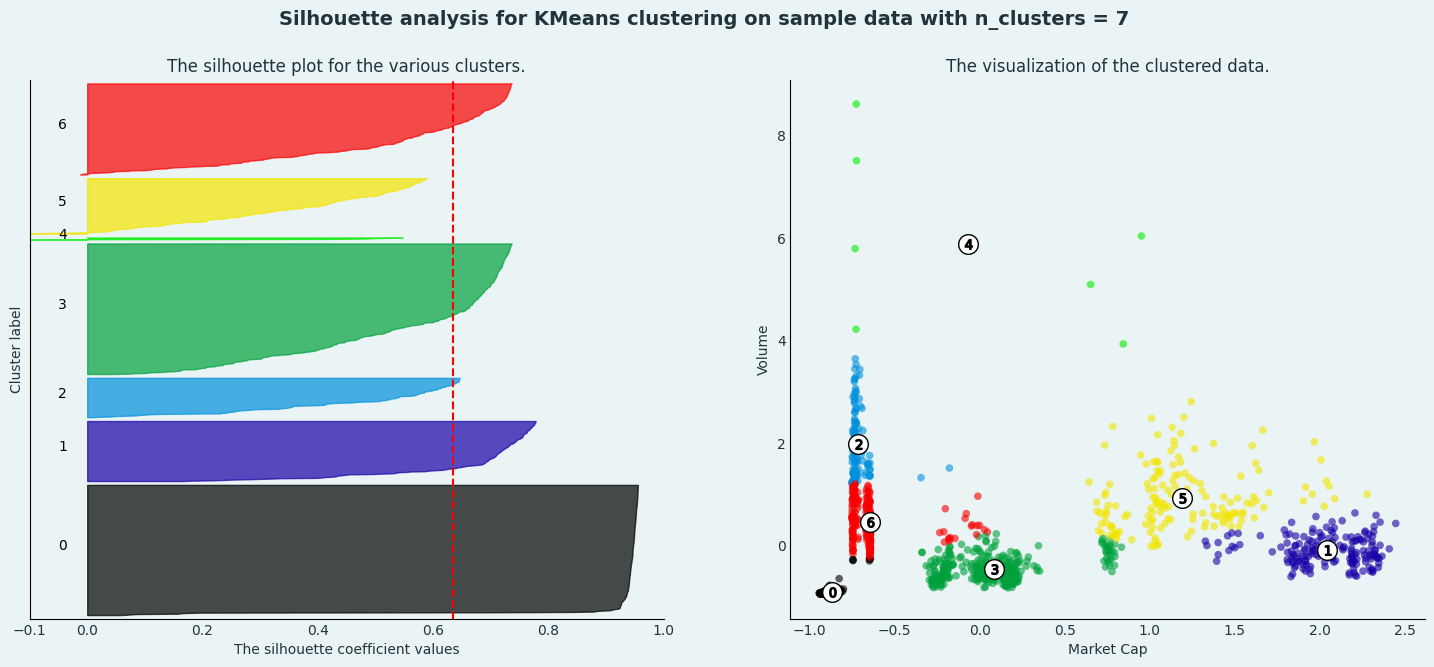

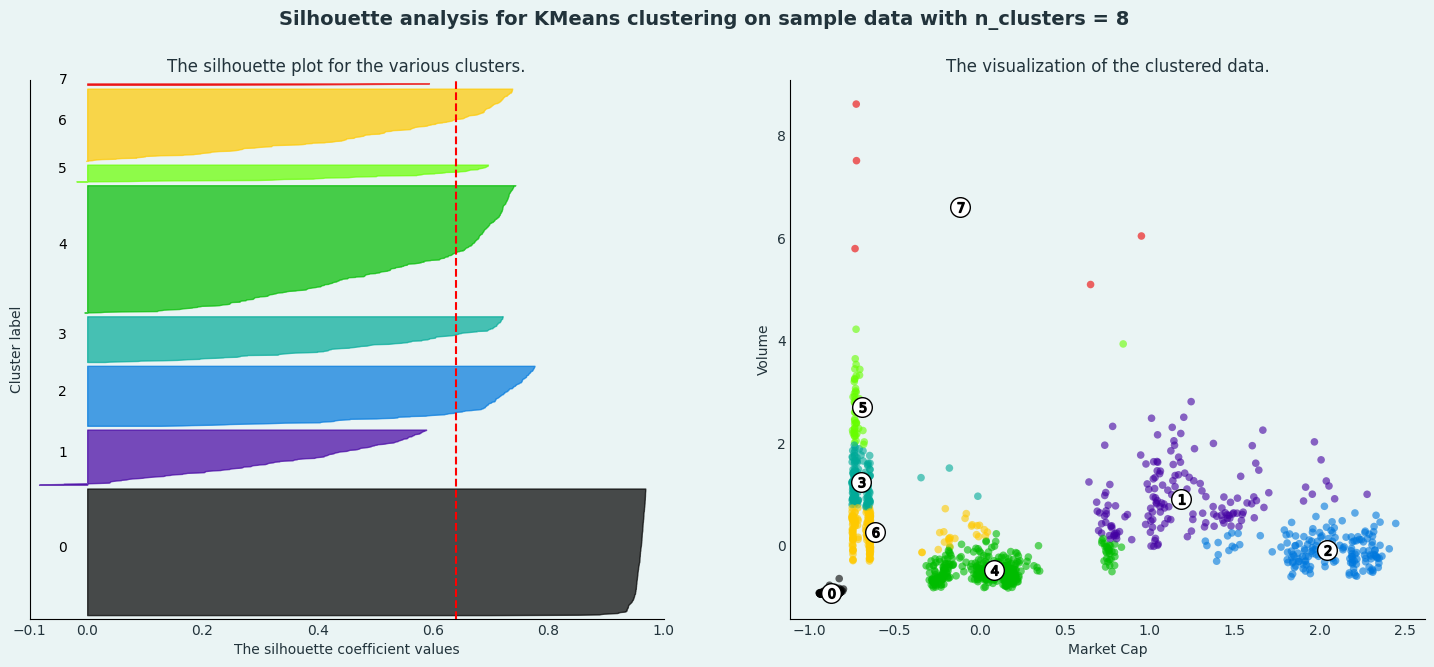

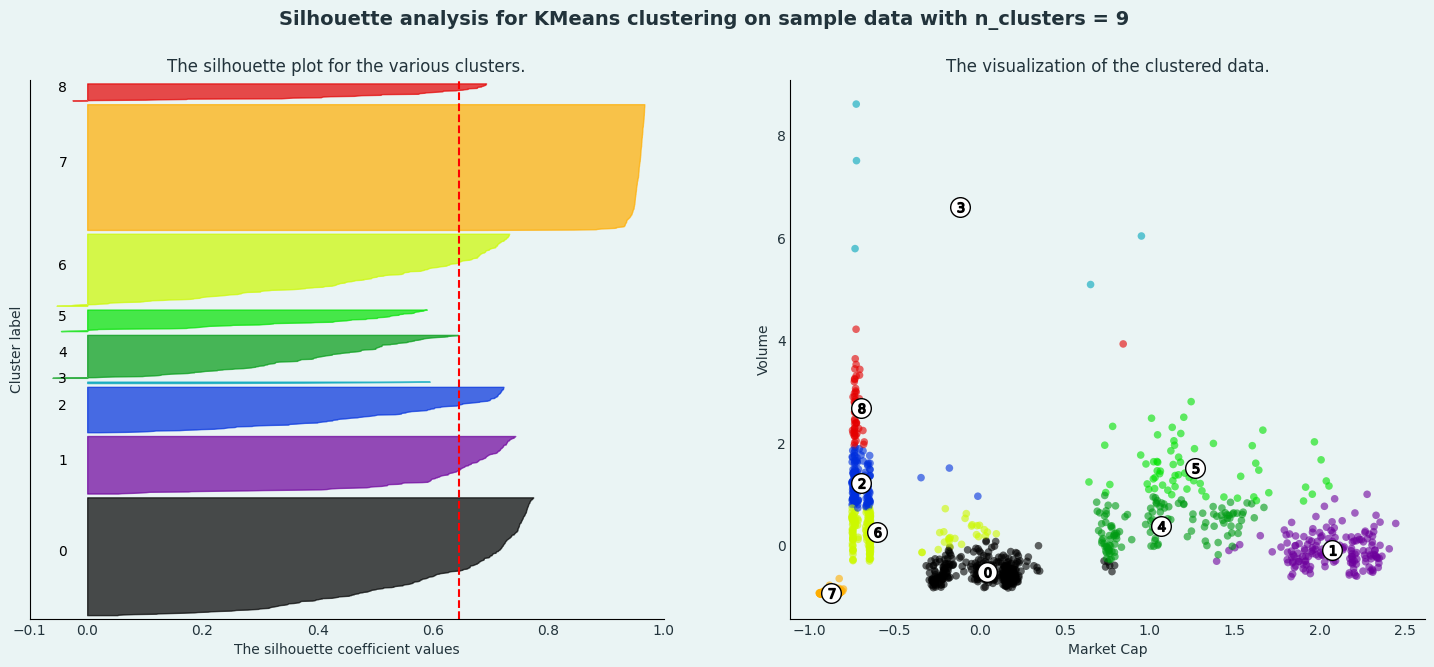

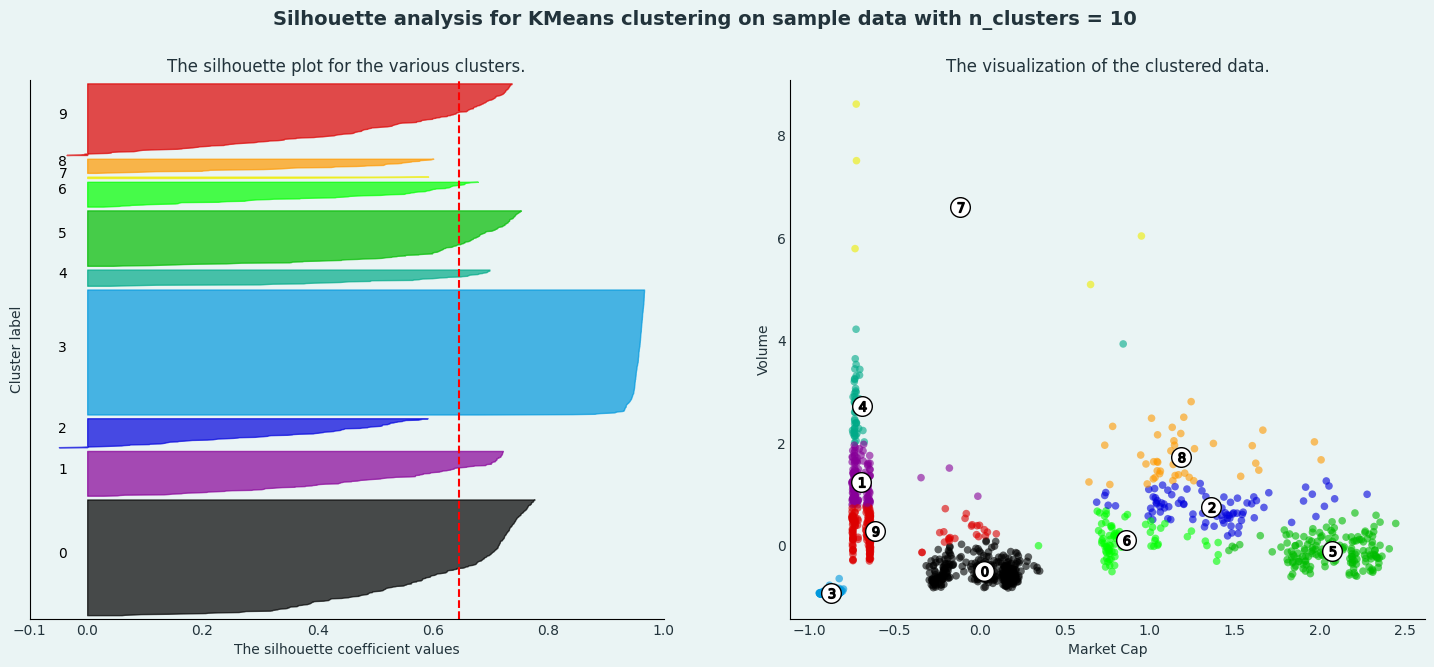

In [50]:
X = data.to_numpy()
range_n_clusters = range(2,11)

ax.plot(range(2, 11), silhouette, marker="o", color="#005f73")
ax.plot(range(2, 11), np.ones(9) * np.max(silhouette), color="red", alpha=0.8)
ax.set_title(
    "average silhouette score of K-means clustering of currensies", fontsize=12, color="#22333b"
)
ax.set_ylabel("Volume", fontsize=10, color="#22333b")
ax.set_xlabel("Number of Clusters", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.", color="#22333b")
    ax1.set_xlabel("The silhouette coefficient values", color="#22333b")
    ax1.set_ylabel("Cluster label", color="#22333b")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker="o", s=30, lw=0, alpha=0.6, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.", color="#22333b")
    ax2.set_xlabel("Market Cap", color="#22333b")
    ax2.set_ylabel("Volume", color="#22333b")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
        color="#22333b"
    )
    ax1.tick_params(axis="both", length=0, labelcolor="#22333b")
    ax1.set_facecolor("#EAF4f4")
    fig.set_facecolor("#EAF4f4")
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax2.tick_params(axis="both", length=0, labelcolor="#22333b")
    ax2.set_facecolor("#EAF4f4")
    ax2.spines["top"].set_visible(False)
    ax2.spines["right"].set_visible(False)

plt.show()

In the left-hand graphs, we can observe the silhouette scores for each clustering. Here, the **y-axis** represents individual data points, while the **x-axis** represents the silhouette score. The red line indicates the average silhouette score for the clustering. However, there are certain considerations to keep in mind when interpreting this chart.<br>
<ul><li>
Firstly, a higher average silhouette score generally indicates better clustering. However, relying solely on this score is not sufficient for determining the optimal clustering solution. </li>
<li>
Secondly, the width of each cluster in the graph corresponds to the number of data points within that cluster. Therefore, it is important to aim for a clustering solution where the number of data points in each cluster is roughly equal.</li>
<li>
Thirdly, it is crucial that the silhouette scores for each individual cluster are good individually as well. It is preferable that the score for each cluster does not fall below the overall average. Otherwise, we risk having a cluster with data points that might actually belong to other clusters.</li>
</ul><br>
These considerations are important for making informed decisions regarding the selection of a suitable clustering solution.

<h5>Conclusion:</h5>

Based on the considerations mentioned earlier, it appears that the number of clusters 4 and 5 may be more suitable compared to other numbers of clusters. Both **4 and 5** clusters exhibit a good average silhouette score, and their issues are relatively fewer compared to other clustering solutions.

In the case of 4 clusters, **one cluster stands out as significantly larger**, suggesting that **it may contain two clusters that are closely related**. However, similar issues exist to some extent in other clusters as well. 

On the other hand, when using 5 clusters, **one cluster exhibits lower scores than the average**, indicating that this particular cluster may not be well-defined. Nevertheless, this problem can also be observed in solutions with a higher number of clusters.

Considering these factors, it can be concluded that the number of clusters 4 or 5 appears to be more suitable for the given dataset.

<h4>Normalization:</h4>

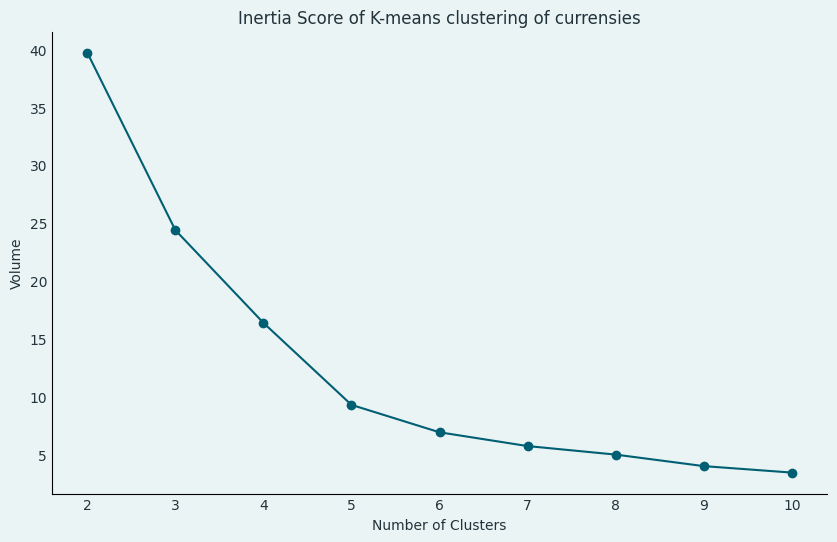

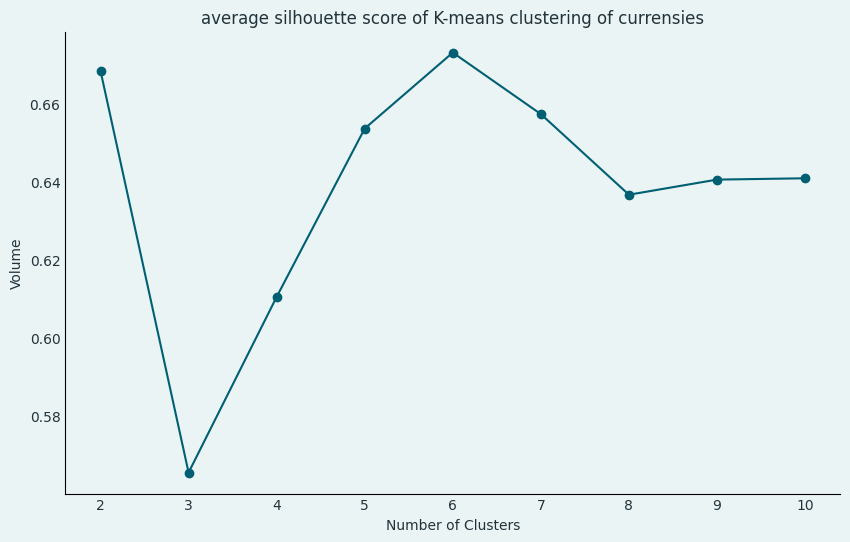

In [51]:
data = df[["market_cap", "volume"]]
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data))

iner = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    iner.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(2, 11), iner, marker="o", color="#005f73")
ax.set_title(
    "Inertia Score of K-means clustering of currensies", fontsize=12, color="#22333b"
)
ax.set_ylabel("Volume", fontsize=10, color="#22333b")
ax.set_xlabel("Number of Clusters", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

silhouette = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    silhouette.append(silhouette_score(data, labels))

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(2, 11), silhouette, marker="o", color="#005f73")
ax.set_title(
    "average silhouette score of K-means clustering of currensies", fontsize=12, color="#22333b"
)
ax.set_ylabel("Volume", fontsize=10, color="#22333b")
ax.set_xlabel("Number of Clusters", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


In the first diagram, there may not be a noticeable difference compared to the previous state. However, in the second diagram, we can observe that the silhouette score reaches its **maximum** value for the clustering with **6 clusters**. However, it is important to note that the difference between the silhouette score of this clustering and the scores of other clusters is not significant.

Thus, we need to further investigate the results obtained from the silhouette method to make a well-informed decision.

For n_clusters = 2 The average silhouette_score is : 0.668300340491687
For n_clusters = 3 The average silhouette_score is : 0.5655828213505073
For n_clusters = 4 The average silhouette_score is : 0.61051472802618
For n_clusters = 5 The average silhouette_score is : 0.6535631116947898
For n_clusters = 6 The average silhouette_score is : 0.6729825769117598
For n_clusters = 7 The average silhouette_score is : 0.657249887582892
For n_clusters = 8 The average silhouette_score is : 0.6366375550216286
For n_clusters = 9 The average silhouette_score is : 0.6405015346866323
For n_clusters = 10 The average silhouette_score is : 0.6408395500136039


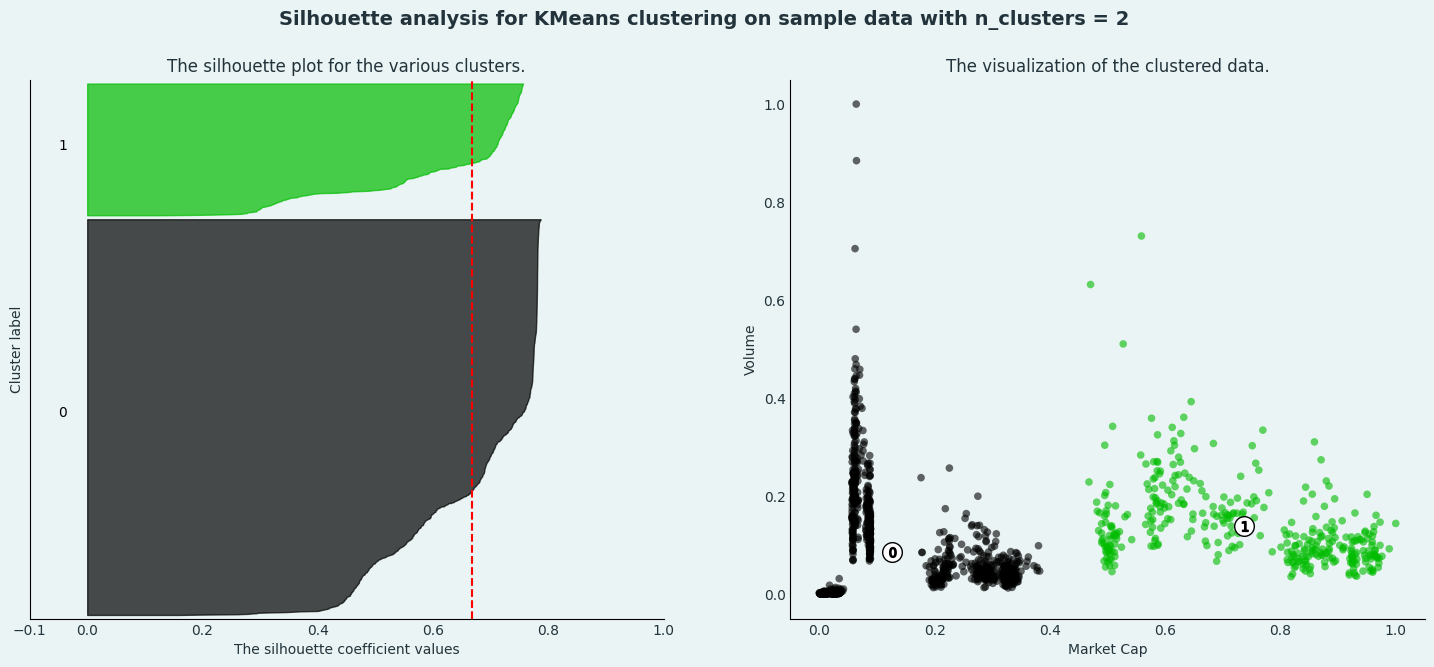

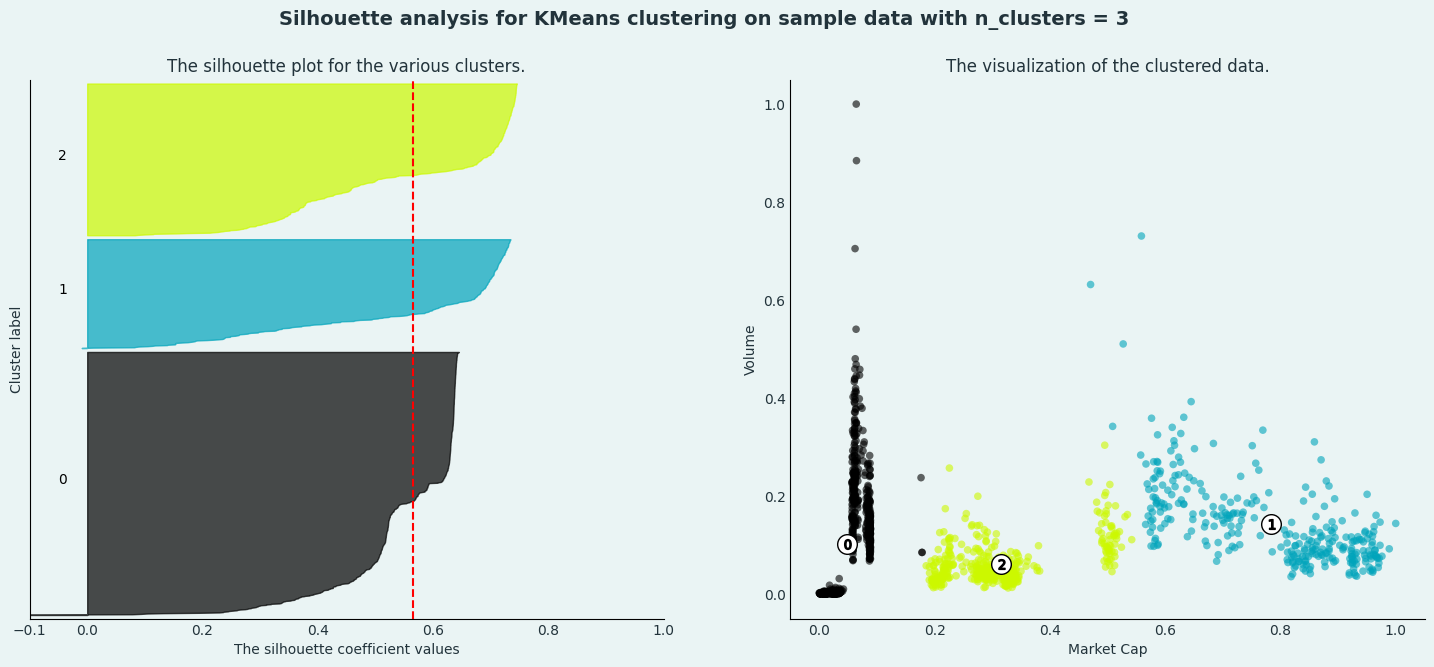

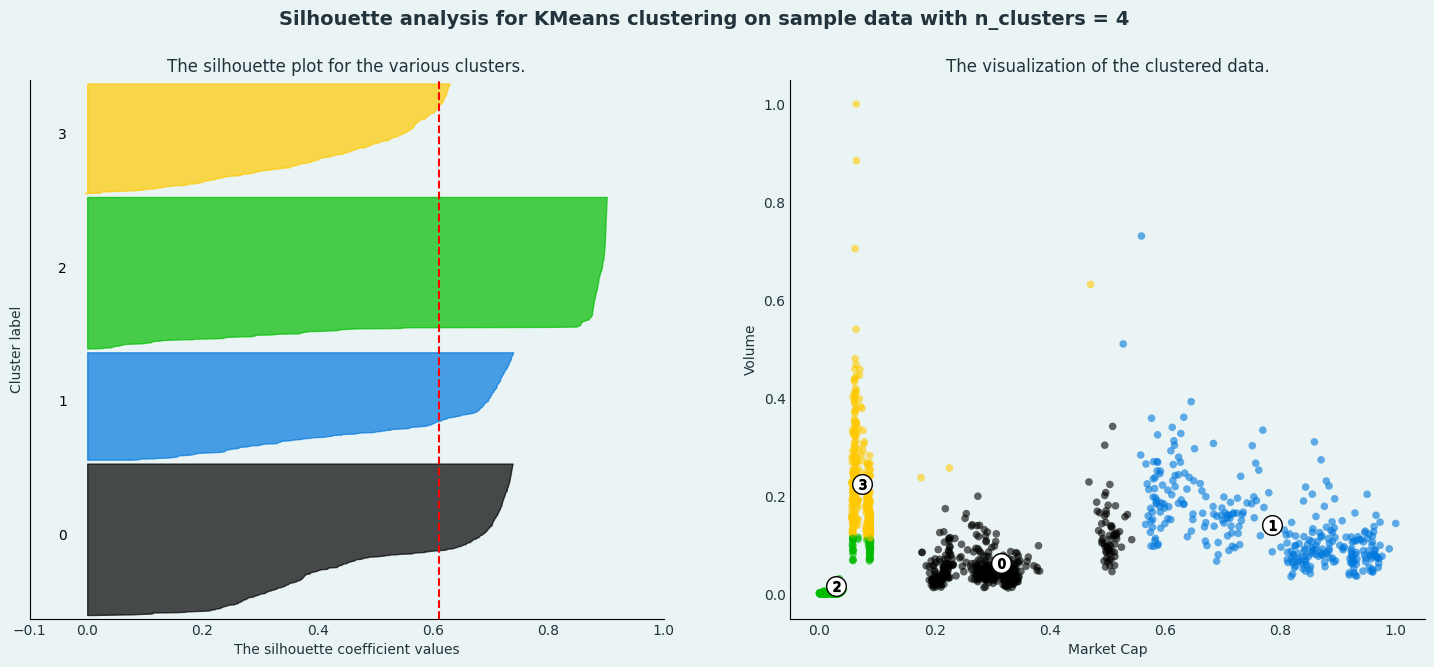

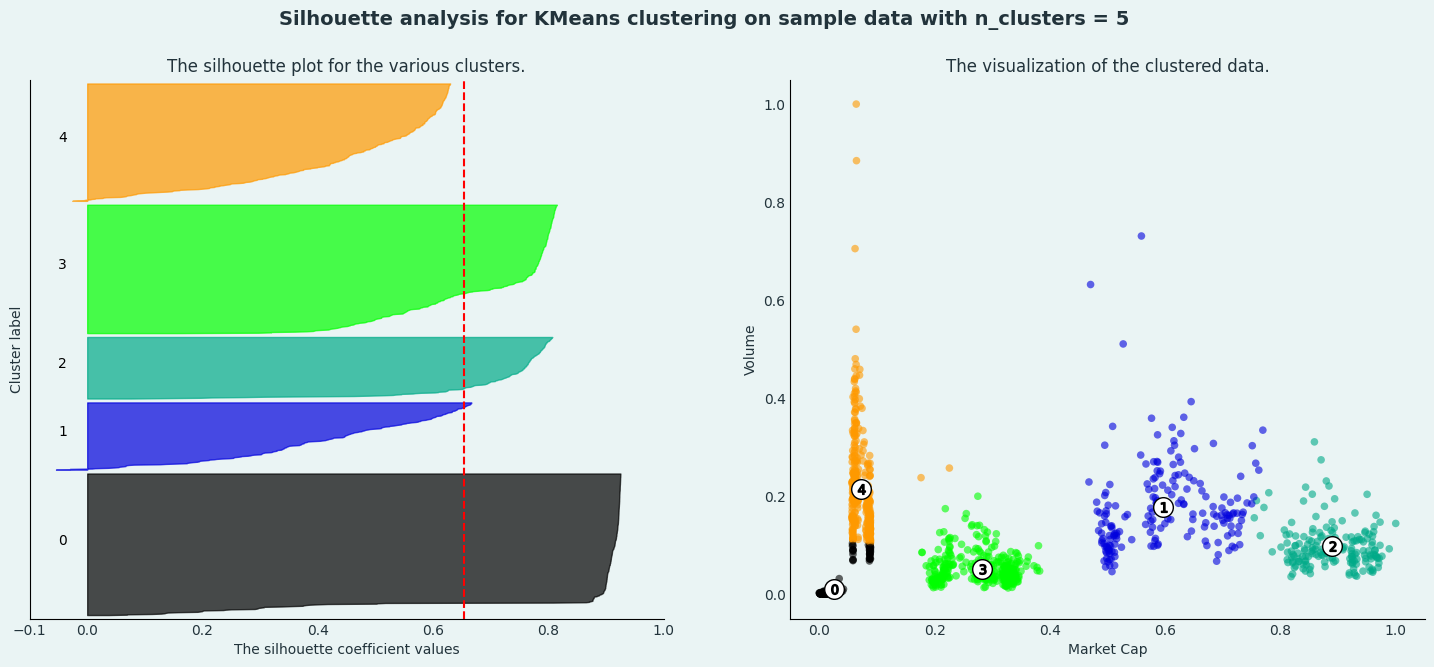

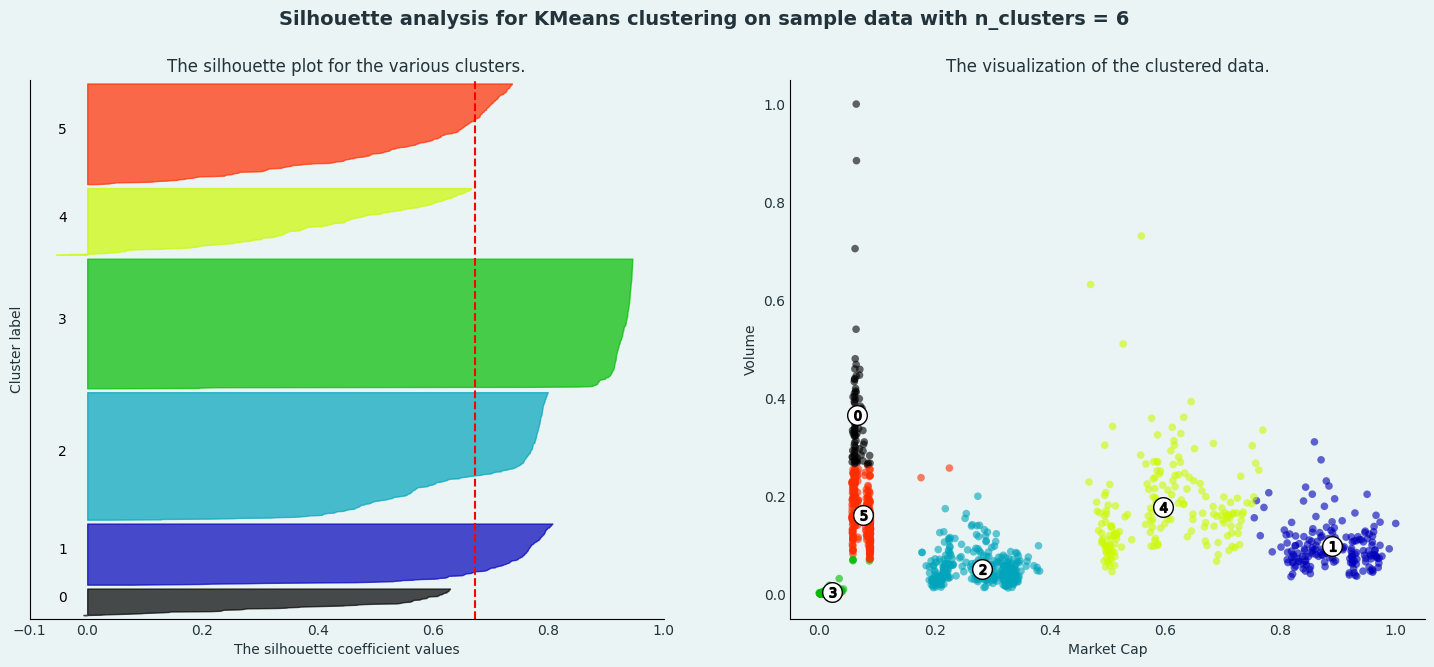

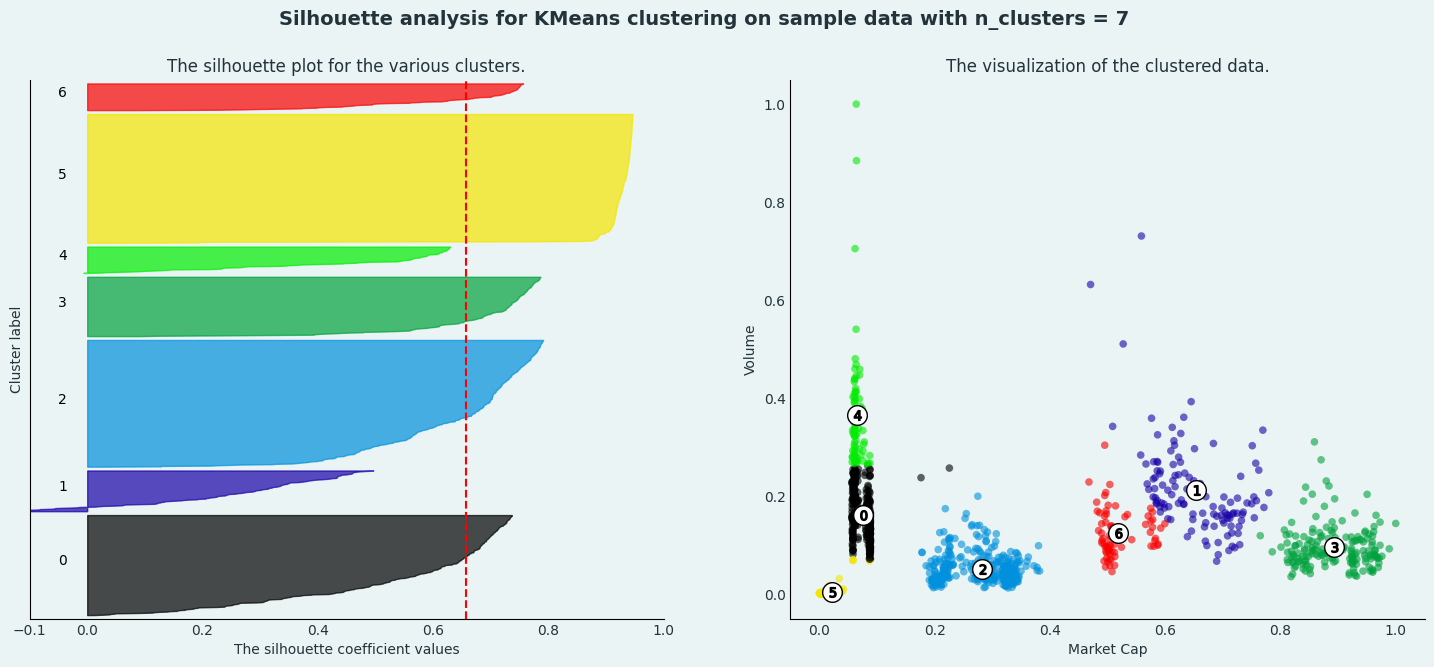

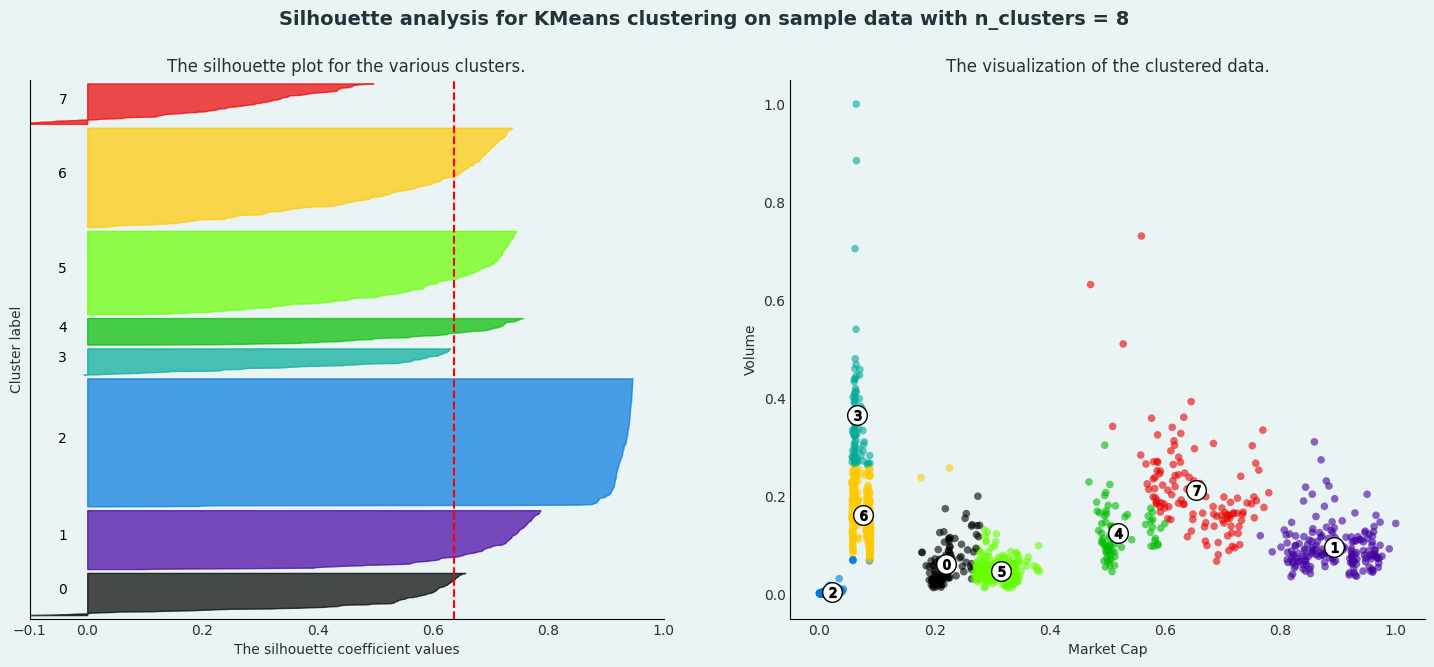

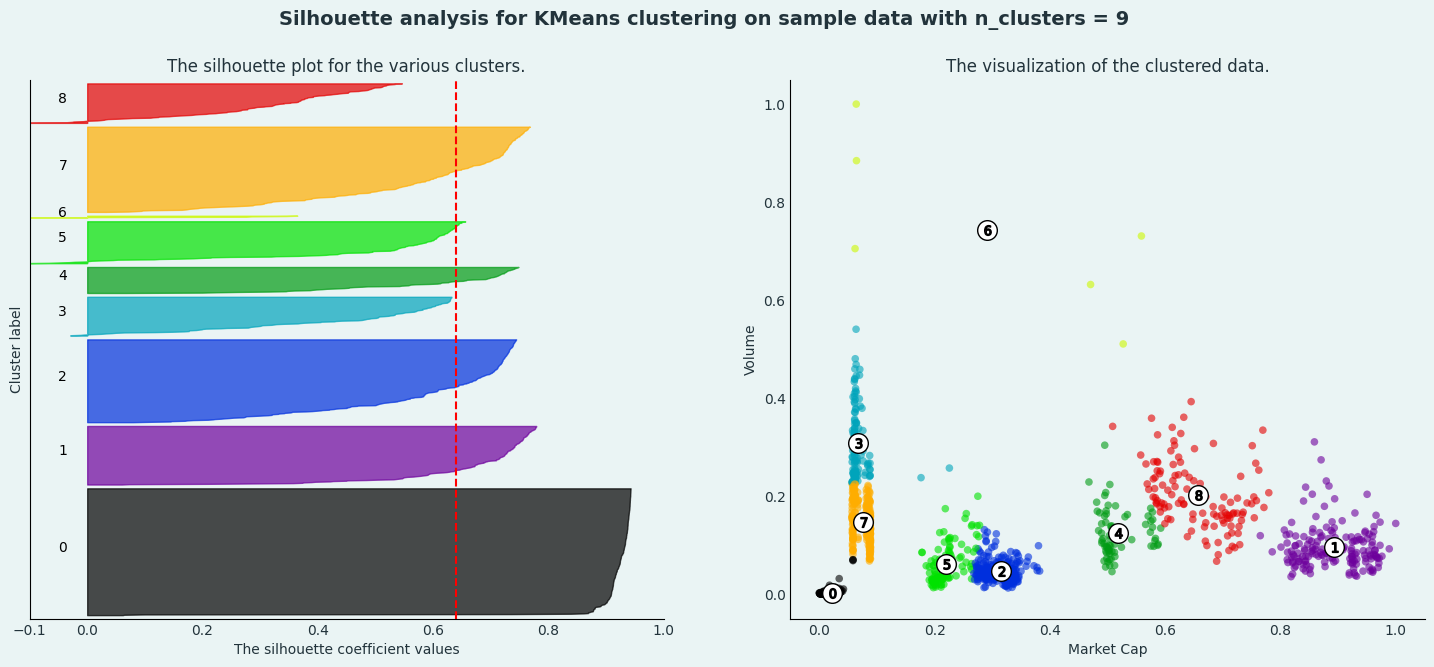

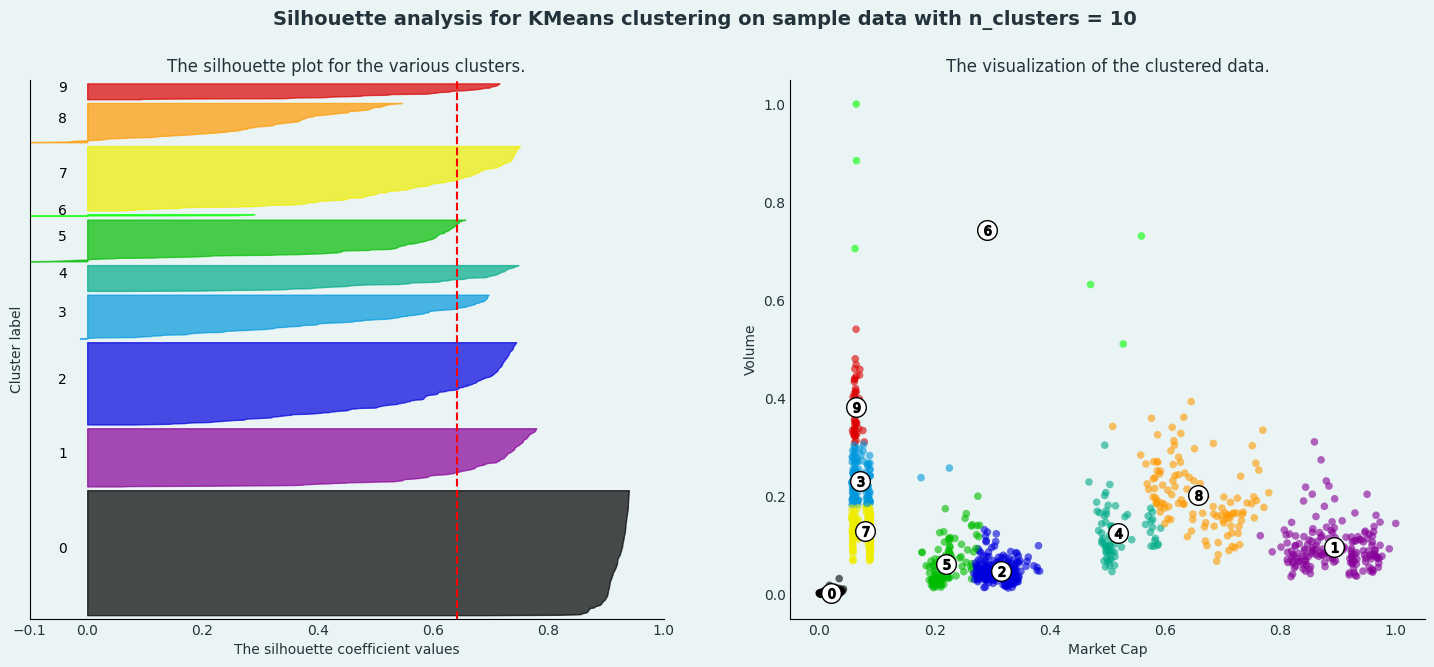

In [52]:

X = data.to_numpy()
range_n_clusters = range(2,11)

ax.plot(range(2, 11), silhouette, marker="o", color="#005f73")
ax.set_title(
    "average silhouette score of K-means clustering of currensies", fontsize=12, color="#22333b"
)
ax.set_ylabel("Volume", fontsize=10, color="#22333b")
ax.set_xlabel("Number of Clusters", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.", color="#22333b")
    ax1.set_xlabel("The silhouette coefficient values", color="#22333b")
    ax1.set_ylabel("Cluster label", color="#22333b")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker="o", s=30, lw=0, alpha=0.6, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.", color="#22333b")
    ax2.set_xlabel("Market Cap", color="#22333b")
    ax2.set_ylabel("Volume", color="#22333b")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
        color="#22333b"
    )
    ax1.tick_params(axis="both", length=0, labelcolor="#22333b")
    ax1.set_facecolor("#EAF4f4")
    fig.set_facecolor("#EAF4f4")
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax2.tick_params(axis="both", length=0, labelcolor="#22333b")
    ax2.set_facecolor("#EAF4f4")
    ax2.spines["top"].set_visible(False)
    ax2.spines["right"].set_visible(False)

plt.show()

Based on the results obtained in this case, it can be concluded that clustering with **4 clusters** is more suitable compared to other clusterings.
This is because the average silhouette score for this clustering is not significantly different from the maximum score obtained.<br>
Additionally, the **number of data points assigned to each cluster is nearly equal**, indicating a balanced distribution.<br>
Moreover, the **silhouette score for each cluster is not lower than the overall average score**.

Therefore, considering these factors, clustering with 4 clusters appears to be the most appropriate choice.